In [1]:
import sys
sys.path.append("../library/")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from defaultPlot import *
from stringFormat import *
import read_data
import dataProcess

In [2]:
real_confirmed = read_data.real_confirmed()
real_time = np.arange(0, len(real_confirmed), 1)

fig4_data = read_data.fig4()
fig4_new_infected = (fig4_data["S"] + fig4_data["QS"])[:-1] - (fig4_data["S"] + fig4_data["QS"])[1:]
fig4_infectious = (fig4_data["A"] + fig4_data["I"])[:-1]
fig4_t = fig4_data["t"][:-1][fig4_infectious != 0]
fig4_reproduction = fig4_new_infected[fig4_infectious != 0] / fig4_infectious[fig4_infectious != 0]

simulated = read_data.KM("ER,N2.0e+04,M10/SE0.114,EAI0.390,pA0.360,IQI0.330,AR0.110,QICR0.080,XQX0.086,T14.000-1722.txt")
time = np.arange(0, len(simulated["S"]), 1)
new_infected = (simulated["S"] + simulated["QS"])[:-1] - (simulated["S"] + simulated["QS"])[1:]
infectious = (simulated["A"] + simulated["I"])[:-1]
simulation_time = time[:-1][infectious != 0]
reproduction = new_infected[infectious != 0] / infectious[infectious != 0]

confirmed = simulated["QA"] + simulated["QI"] + simulated["CR"]

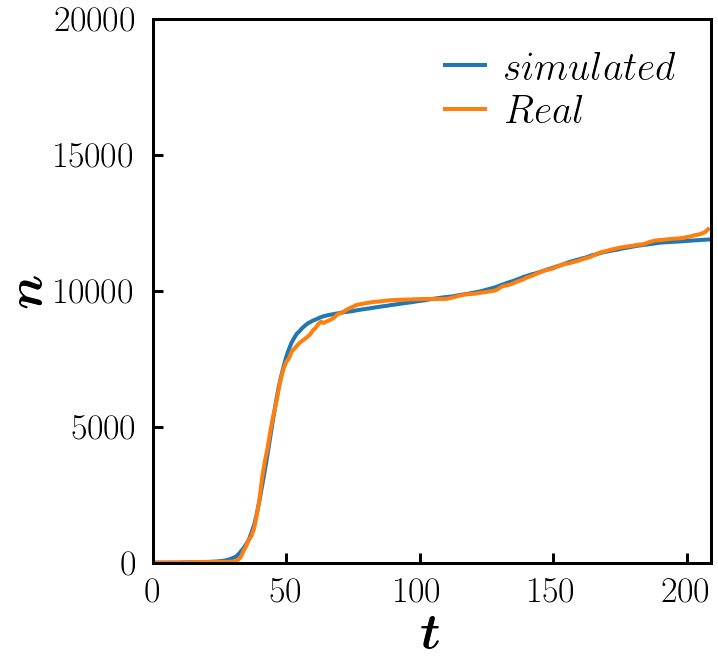

In [6]:
fig, ax = plt.subplots()

ax.plot(time, confirmed, label=latex_string("simulated"))
ax.plot(real_time, real_confirmed, label=latex_string("Real"))
# ax.plot(fig4_data["t"], (fig4_data["QA"] + fig4_data["QI"] + fig4_data["CR"]), label=latex_string("Fig4"))

ax.set_xlim(left=0, right=209)
ax.set_ylim(bottom=0, top=20000)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("n"))
ax.legend(loc="upper right")
fig.show()


In [8]:
energy = np.sqrt(np.power(confirmed - real_confirmed, 2.0).mean())
print(energy)

4920.310940499205


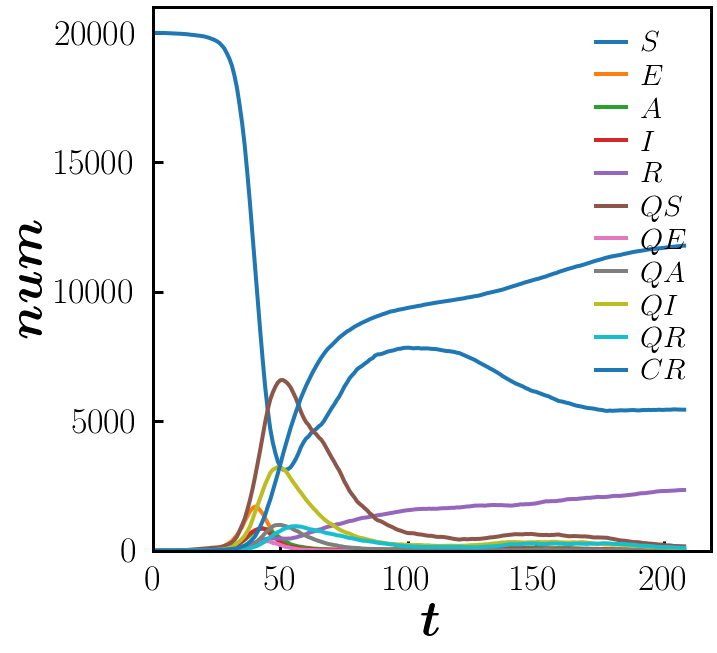

In [7]:
fig, ax = plt.subplots()

ax.plot(time, simulated["S"], label=latex_string("S"))
ax.plot(time, simulated["E"], label=latex_string("E"))
ax.plot(time, simulated["A"], label=latex_string("A"))
ax.plot(time, simulated["I"], label=latex_string("I"))
ax.plot(time, simulated["R"], label=latex_string("R"))
ax.plot(time, simulated["QS"], label=latex_string("QS"))
ax.plot(time, simulated["QE"], label=latex_string("QE"))
ax.plot(time, simulated["QA"], label=latex_string("QA"))
ax.plot(time, simulated["QI"], label=latex_string("QI"))
ax.plot(time, simulated["QR"], label=latex_string("QR"))
ax.plot(time, simulated["CR"], label=latex_string("CR"))

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("num"))
ax.legend(loc="upper right", fontsize=30)
fig.show()

# Reproduction Number

In [21]:
raw_Rt = pd.read_csv("data/r_estimates.csv", parse_dates=["Date"], index_col="Date")
df = raw_Rt[raw_Rt["Code"] == "KR"]
df = df.drop(["Code", "EnoughData"], axis=1)
df.columns = ["mean", "std"]
df


,mean,std
Date,,
2020-03-05 00:00:00+00:00,1.898837,0.058739
2020-03-06 00:00:00+00:00,1.741558,0.049853
2020-03-07 00:00:00+00:00,1.587823,0.042346
2020-03-08 00:00:00+00:00,1.453047,0.036103
2020-03-09 00:00:00+00:00,1.323874,0.030687
...,...,...
2021-03-01 00:00:00+00:00,0.994376,0.012776
2021-03-02 00:00:00+00:00,0.964668,0.012652
2021-03-03 00:00:00+00:00,0.935220,0.012412


In [300]:
fileName = "ER,N2.1e+04,M10/SE0.110,EAI0.390,pA0.360,IQI0.330,AR0.110,QICR0.080,XQX0.090,T14.000-26.txt"
#* -28, 1.2, 0.1
data = read_data.KM_Rt(fileName)
networkSize = float(fileName[fileName.find("N")+1 : fileName.find(",M")])
SE = float(fileName[fileName.find("SE")+2 : fileName.find(",EAI")])
IQI = float(fileName[fileName.find("IQI") +3 : fileName.find(",AR")])

real_confirmed = read_data.real_confirmed()
real_time = np.arange(0, len(real_confirmed), 1)
real_t, real_Rt = read_data.real_Rt()
real_t -= 12
t = np.arange(0, len(data["R"]), 1)
Rt = data["Rt"]
bin_t, Rt = dataProcess.avgLinBin(t, Rt, delta=2)


temp1, temp2 = 36, 37
Rt_estimated1 = 2.0 * data["L"][:temp1] / networkSize * SE / IQI
t1 = t[:temp1]
Rt_estimated2 = 1.2 * data["L"][temp2:] / networkSize * SE / IQI + 0.1
t2 = t[temp2:]

# Rt_estimated = 2.0*data["L"]/networkSize * SE / IQI


new_infected = (data["S"] + data["QS"])[:-1] - (data["S"] + data["QS"])[1:]
infectious = (data["A"] + data["I"])[:-1]
Rt_naive = new_infected[infectious != 0] / infectious[infectious != 0]
t_naive = t[:-1][infectious != 0]



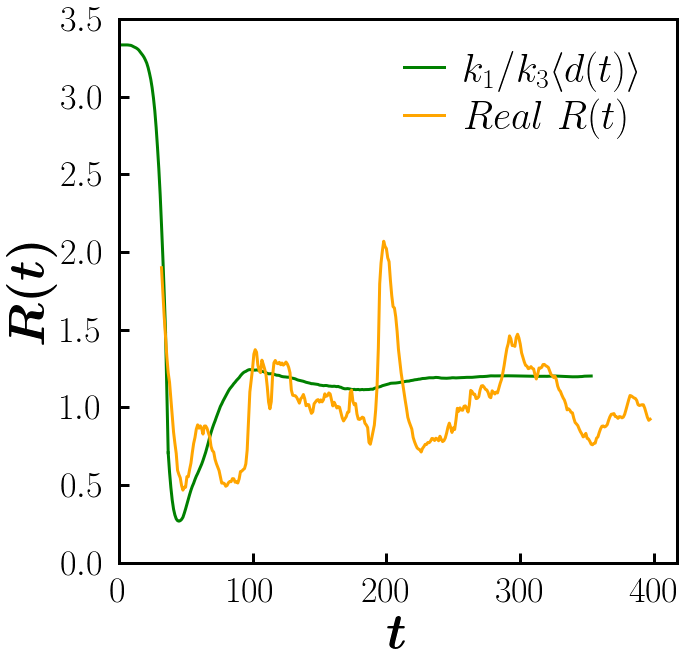

In [313]:
fig, ax = plt.subplots()

# ax.plot(bin_t, Rt, label=latex_string("simulated\ R(t)"), linewidth=3)
ax.plot(t1, Rt_estimated1, label=latex_string("k_1/k_3 \langle d(t)\\rangle"), color='g', linewidth=3)
ax.plot(t2, Rt_estimated2, color='g', linewidth=3)
ax.plot([t1[-1], t2[0]], [Rt_estimated1[-1], Rt_estimated2[0]], color='g', linewidth=3)

start = 32
ax.plot(np.arange(start, df.shape[0]+start), df["mean"],label=latex_string("Real\ R(t)"), color='orange', linewidth=3)

ax.set_xlim(left=0)
# ax.set_xlim(left=0, right=180)
ax.set_ylim(bottom=0)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("R(t)"))
ax.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])
# ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.legend(loc="best")
fig.savefig("fig/model_Rt.png", facecolor='w')
# fig.savefig("fig/simulated_Rt.png", facecolor='w')
fig.show()


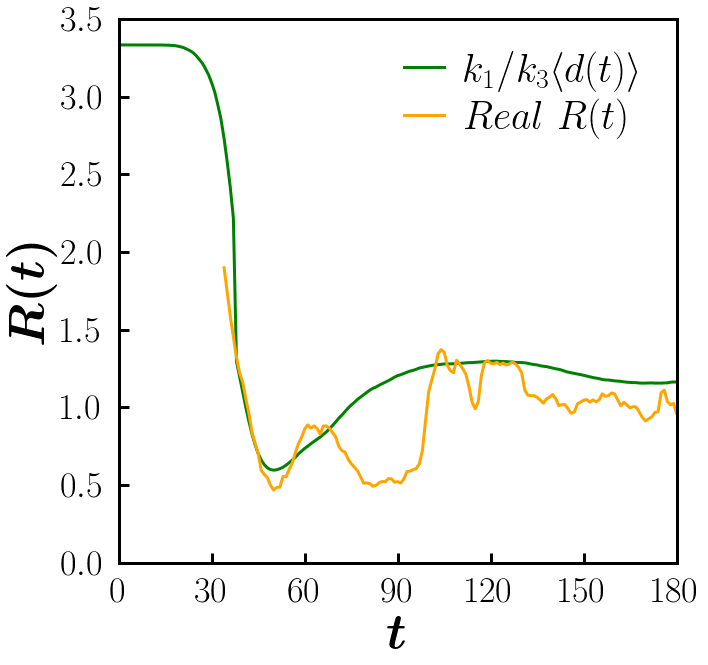

In [220]:
fig, ax = plt.subplots()

# ax.plot(bin_t, Rt, label=latex_string("simulated\ R(t)"))
ax.plot(t, Rt_estimated, label=latex_string("k_1/k_3 \langle d(t)\\rangle"), color='g', linewidth=3)
start = 34
ax.plot(np.arange(start, df.shape[0]+start), df["mean"],label=latex_string("Real\ R(t)"), color='orange', linewidth=3)

ax.axvline(temp1)
ax.set_xlim(left=0, right=180)
ax.set_ylim(bottom=0)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("R(t)"))
ax.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])
ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.legend(loc="best")
fig.show()


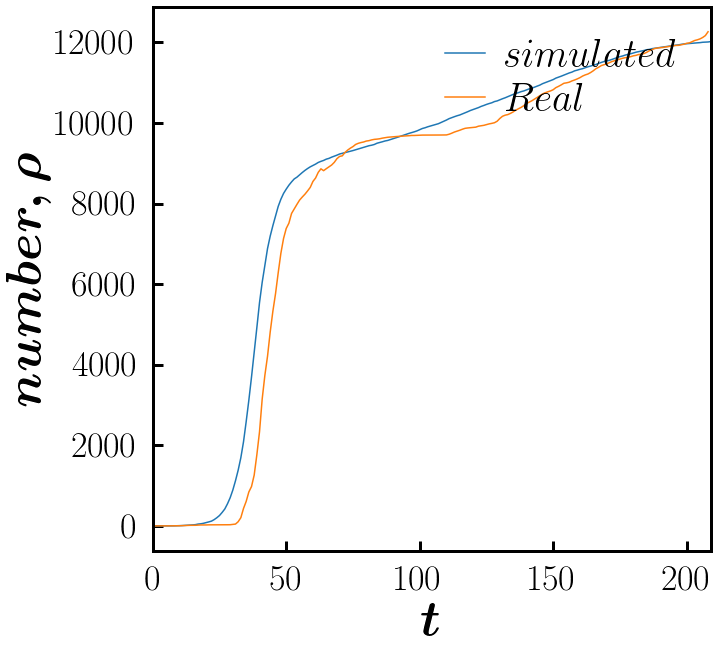

In [130]:
fig, ax = plt.subplots()

ax.plot(t, data["QA"] + data["QI"] + data["CR"], label=latex_string("simulated"))
ax.plot(real_time, real_confirmed, label=latex_string("Real"))

ax.set_xlim(left=0, right=209)
# ax.set_ylim(bottom=0, top=20000)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("number, \\rho"))
ax.legend(loc="upper right")
fig.show()
